In [1]:
    from keras.preprocessing.image import ImageDataGenerator
    from keras.models import Sequential
    from keras.layers import Conv2D, MaxPooling2D
    from keras.layers import Activation, Dropout, Flatten, Dense
    from keras import backend as k
    import numpy as np
    from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
data_dir="Images"
img_size = 60

train_data_param=ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [3]:
training_data = train_data_param.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training')

Found 16508 images belonging to 120 classes.


In [4]:
validation_data=train_data_param.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation')

Found 4072 images belonging to 120 classes.


In [5]:
if k.image_data_format() =='channels_first':
    input_shape = (1, img_size, img_size)
else:
    input_shape = (img_size, img_size, 1)

In [6]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
#model.add(Conv2D(32,(3,3), input_shape=input_shape, padding='same'))
#model.add(Activation('relu'))
#model.add(Dropout(0.4))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(Dropout(0.4))
model.add(Conv2D(64,(3,3), input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#model.add(Dropout(0.4))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))
#model.add(Dense(64))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
#model.add(Conv2D(32,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(Conv2D(64,(3,3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(120))
model.add(Activation('softmax'))



#model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (3, 3), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)      

In [7]:
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [8]:
history=model.fit_generator(
            training_data,
            steps_per_epoch=1000,
            epochs=80,
            validation_data=validation_data,
            validation_steps=32,
            shuffle=True)

model.save_weights('second_try.h5')

Epoch 1/80
1000/1000 [==============================] - 196s 196ms/step - loss: 4.6303 - accuracy: 0.0247 - val_loss: 4.3749 - val_accuracy: 0.0381
Epoch 2/80
1000/1000 [==============================] - 199s 199ms/step - loss: 4.3756 - accuracy: 0.0477 - val_loss: 4.3720 - val_accuracy: 0.0508
Epoch 3/80
1000/1000 [==============================] - 198s 198ms/step - loss: 4.2438 - accuracy: 0.0650 - val_loss: 4.1473 - val_accuracy: 0.0645
Epoch 4/80
1000/1000 [==============================] - 200s 200ms/step - loss: 4.1266 - accuracy: 0.0814 - val_loss: 4.6298 - val_accuracy: 0.0830
Epoch 5/80
1000/1000 [==============================] - 199s 199ms/step - loss: 4.0292 - accuracy: 0.0936 - val_loss: 4.1100 - val_accuracy: 0.0830
Epoch 6/80
1000/1000 [==============================] - 203s 203ms/step - loss: 3.9343 - accuracy: 0.1078 - val_loss: 3.9019 - val_accuracy: 0.1084
Epoch 7/80
1000/1000 [==============================] - 199s 199ms/step - loss: 3.8534 - accuracy: 0.1192 - val_

1000/1000 [==============================] - 195s 195ms/step - loss: 2.2639 - accuracy: 0.4088 - val_loss: 4.8242 - val_accuracy: 0.1610
Epoch 57/80
1000/1000 [==============================] - 196s 196ms/step - loss: 2.2674 - accuracy: 0.4103 - val_loss: 3.8532 - val_accuracy: 0.1299
Epoch 58/80
1000/1000 [==============================] - 195s 195ms/step - loss: 2.2368 - accuracy: 0.4174 - val_loss: 3.9637 - val_accuracy: 0.1572
Epoch 59/80
1000/1000 [==============================] - 200s 200ms/step - loss: 2.2196 - accuracy: 0.4205 - val_loss: 4.6364 - val_accuracy: 0.1357
Epoch 60/80
1000/1000 [==============================] - 200s 200ms/step - loss: 2.2151 - accuracy: 0.4205 - val_loss: 5.1354 - val_accuracy: 0.1420
Epoch 61/80
1000/1000 [==============================] - 196s 196ms/step - loss: 2.2057 - accuracy: 0.4255 - val_loss: 4.3683 - val_accuracy: 0.1309
Epoch 62/80
1000/1000 [==============================] - 196s 196ms/step - loss: 2.1936 - accuracy: 0.4259 - val_loss:

In [9]:
img_pred = image.load_img('Images/n02116738-African_hunting_dog/n02116738_500.jpg', color_mode = "grayscale", target_size = (img_size, img_size))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis = 0)

In [10]:
rslt = model.predict(img_pred)
print(rslt)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 4.3889203e-24
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9714305e-09
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000

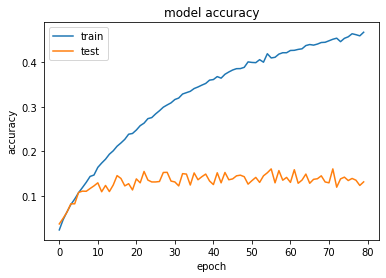

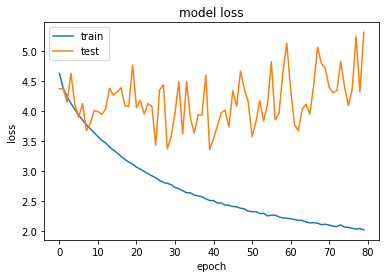

In [12]:
import matplotlib. pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()